## Additional import for adding package path for iCSF

In [1]:
import sys
sys.path.append("/mnt/iusers01/jf01/mbcx9cd4/.local/lib/python3.6/site-packages")
print('\n'.join(sys.path))
#add the right path to look for the packages (incl. lmfit)

C:\Users\mbgnwob2\Dropbox (The University of Manchester)\2. Project\Python Script\Single Peak Fitting Script ORIGINAL - Copy
C:\Users\mbgnwob2\AppData\Local\Continuum\anaconda3\python37.zip
C:\Users\mbgnwob2\AppData\Local\Continuum\anaconda3\DLLs
C:\Users\mbgnwob2\AppData\Local\Continuum\anaconda3\lib
C:\Users\mbgnwob2\AppData\Local\Continuum\anaconda3

C:\Users\mbgnwob2\AppData\Local\Continuum\anaconda3\lib\site-packages
C:\Users\mbgnwob2\AppData\Local\Continuum\anaconda3\lib\site-packages\win32
C:\Users\mbgnwob2\AppData\Local\Continuum\anaconda3\lib\site-packages\win32\lib
C:\Users\mbgnwob2\AppData\Local\Continuum\anaconda3\lib\site-packages\Pythonwin
C:\Users\mbgnwob2\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\extensions
C:\Users\mbgnwob2\.ipython
/mnt/iusers01/jf01/mbcx9cd4/.local/lib/python3.6/site-packages


## Import packages

In [2]:
#import the models and plotting tools

import numpy as np
import matplotlib.pyplot as plt
from lmfit.models import PseudoVoigtModel  ##error: No module named 'lmfit'
from lmfit import Model
from lmfit.parameter import Parameters
from ipywidgets import FloatProgress
from IPython.display import display
from pathlib import Path
from scipy.signal import medfilt

import time
import os
import pickle

#import diamond_functions as dia
from diamond_functions import *

#for graphs inline with the text on mac and widows...
%matplotlib inline
#for interactive graphs inline with the text on mac and widows...
#%matplotlib interactive
#best for pop-out graphs on windows...
#%matplotlib tk
#best for pop-out graphs on mac...
# %matplotlib
#for pop-out graphs on mac and windows, but it's a bit dodgey...
#%matplotlib qt

## Adjusting plot parameters

In [3]:
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.rc('legend',fontsize=20)
plt.rc('axes',linewidth=2)
plt.rc('xtick.major',width=2,size=10)
plt.rc('xtick.minor', width=2, size=5)
plt.rc('ytick.major',width=2,size=10)
plt.rc('ytick.minor',width=2,size=5)

## Define directory & fileprefix:

In [4]:
#dirname=Path(str('Test_data_Sample2_tension_strain/'))
#dirname=f'{dirname}{os.sep}'
filePrefix = 'Strain_'
fname=filePrefix+'00000.dat'
#open_z_file=str(dirname+fname)

out_dir = Path(str('S2_Out_plots\Cake 19_Plots'))
out_dir = f'{out_dir}{os.sep}'

#print('dirname = ' + dirname)
print('filePrefix = ' + filePrefix)
#print(fname)
#print('combined = ' + open_z_file)
print('Output folder is: ' + out_dir)

filePrefix = Strain_
Output folder is: S2_Out_plots\Cake 19_Plots\


## Load a data file

Enter which peak file you wish to analyse:

In [5]:
import glob, os
pickle_dir = 'Test_Sample2_FitResults_Cake19'
pickle_dir = f'{pickle_dir}{os.sep}'
pickle_type = '*.pickle'

## Load in all intensity files and chack how many exist ##update location required
dicts = glob.glob(pickle_dir + pickle_type)
num_dicts=len(dicts)
print('Number of dictionary files = ', num_dicts)
print(dicts)

Number of dictionary files =  3
['Test_Sample2_FitResults_Cake19\\Strain_(01-10) & (111).pickle', 'Test_Sample2_FitResults_Cake19\\Strain_(220) & (11-20).pickle', 'Test_Sample2_FitResults_Cake19\\Strain_(311) & (02-20).pickle']


Text(0.5, 0, 'Strain, ${\\epsilon}$')

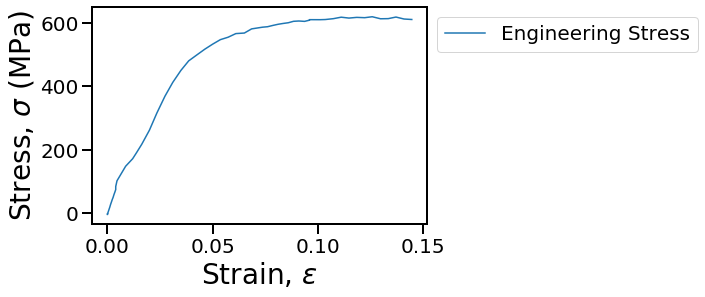

In [6]:
## Load mechanical data from file
Eng_stress = np.loadtxt('Stress_strain_Tension_Samp2.txt', usecols=0)
Eng_stress = Eng_stress[:-1]
Eng_strain = np.loadtxt('Stress_strain_Tension_Samp2.txt', usecols=1)
Eng_strain = Eng_strain[:-1]
plt.plot(Eng_strain, Eng_stress, label = 'Engineering Stress')
plt.legend(loc=2, bbox_to_anchor=(1, 1))
plt.ylabel('Stress, $\sigma$ (MPa)', fontsize=28)
plt.xlabel('Strain, ${\epsilon}$', fontsize=28)

In [7]:
## make a list of the dictionaries

dict_names = []

for i in dicts:
    dict_names.append(i.split('\\')[1]) 

print(dict_names)

['Strain_(01-10) & (111).pickle', 'Strain_(220) & (11-20).pickle', 'Strain_(311) & (02-20).pickle']


Directory & file: Test_Sample2_FitResults_Cake19\Strain_(01-10) & (111).pickle
Images analysed: 59
Reflections: (01-10) & (111)
Current Peak List is: ['(01-10)', '(111)']
Number of Strain Steps: 59
Directory & file: Test_Sample2_FitResults_Cake19\Strain_(220) & (11-20).pickle
Images analysed: 59
Reflections: (220) & (11-20)
Current Peak List is: ['(220)', '(11-20)']
Number of Strain Steps: 59
Directory & file: Test_Sample2_FitResults_Cake19\Strain_(311) & (02-20).pickle
Images analysed: 59
Reflections: (311) & (02-20)
Current Peak List is: ['(311)', '(02-20)']
Number of Strain Steps: 59


C:\Users\mbgnwob2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:148: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\mbgnwob2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\mbgnwob2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and m

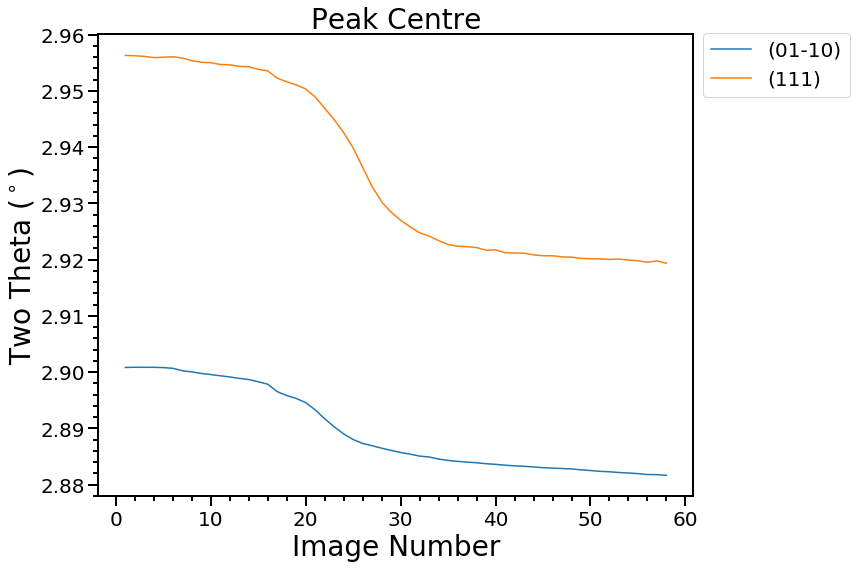

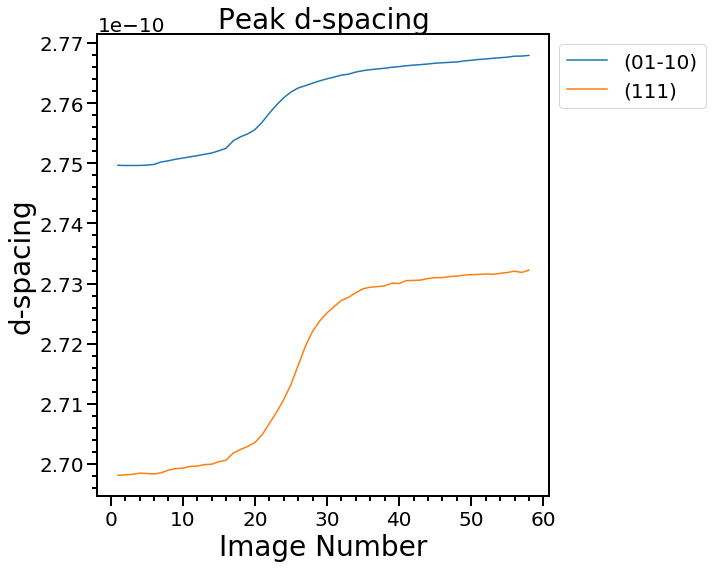

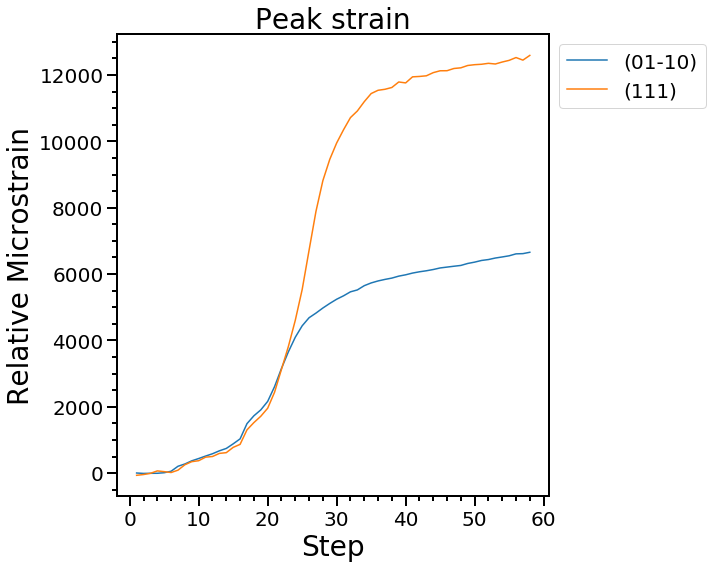

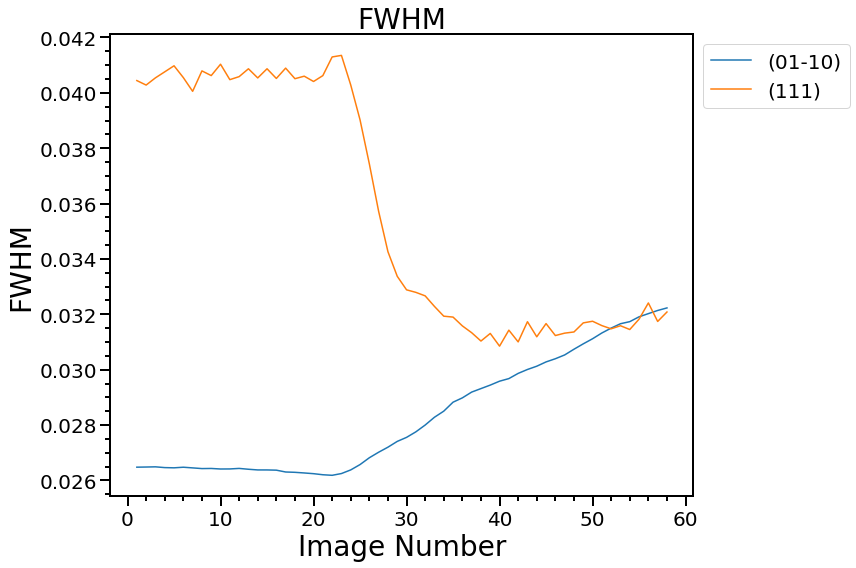

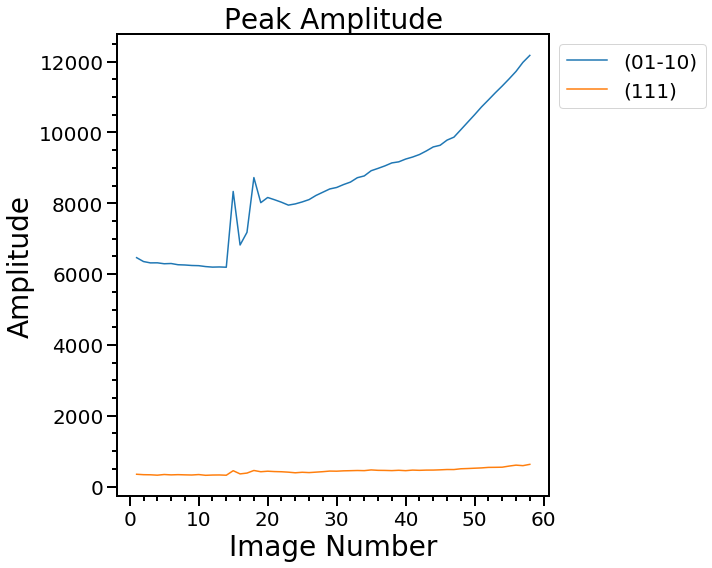

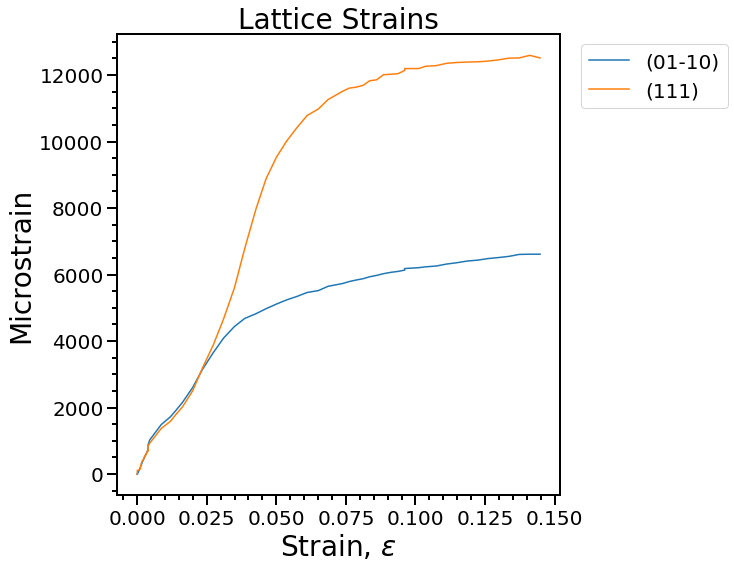

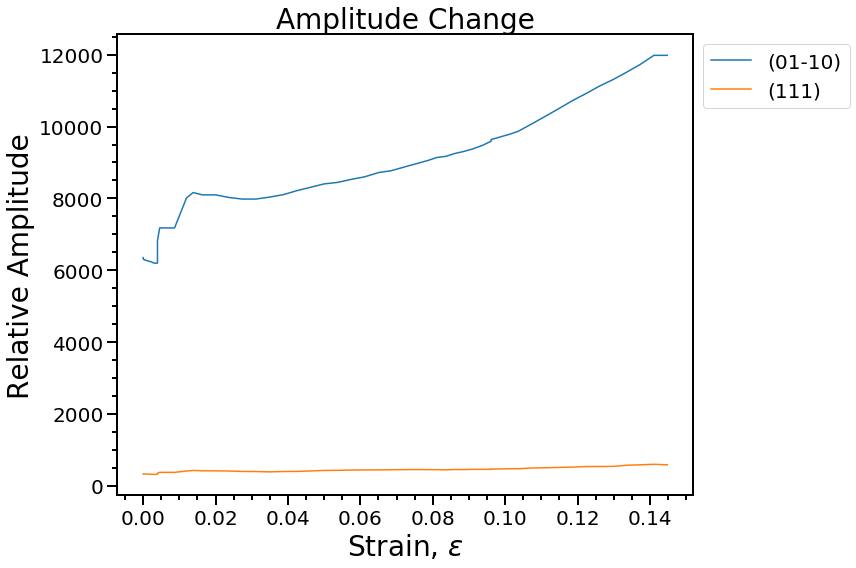

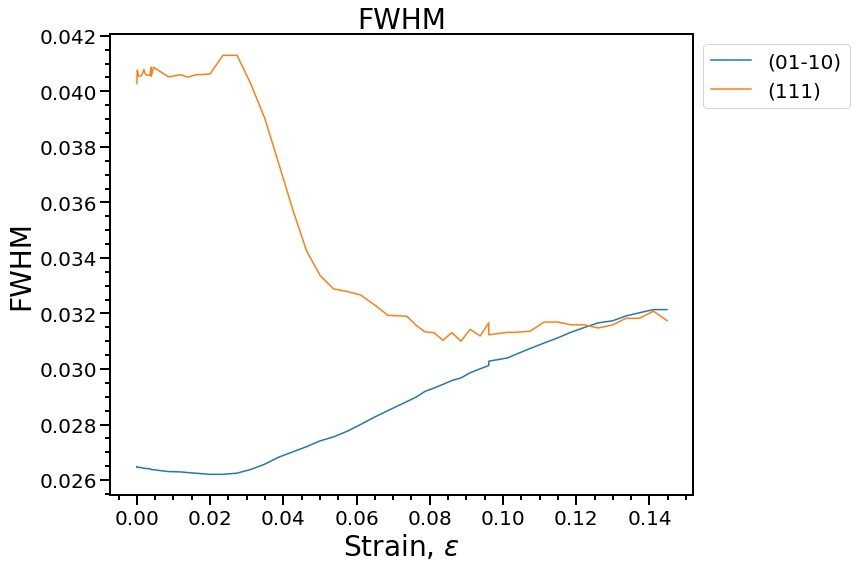

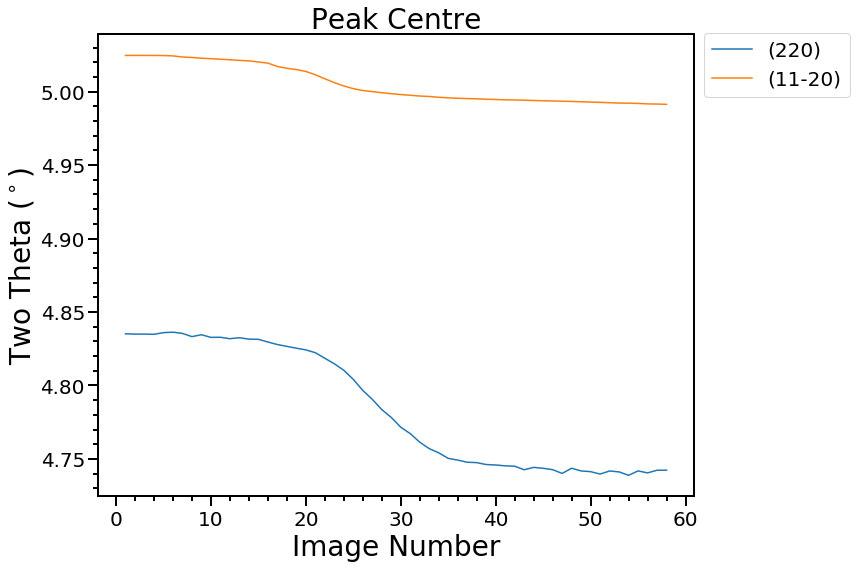

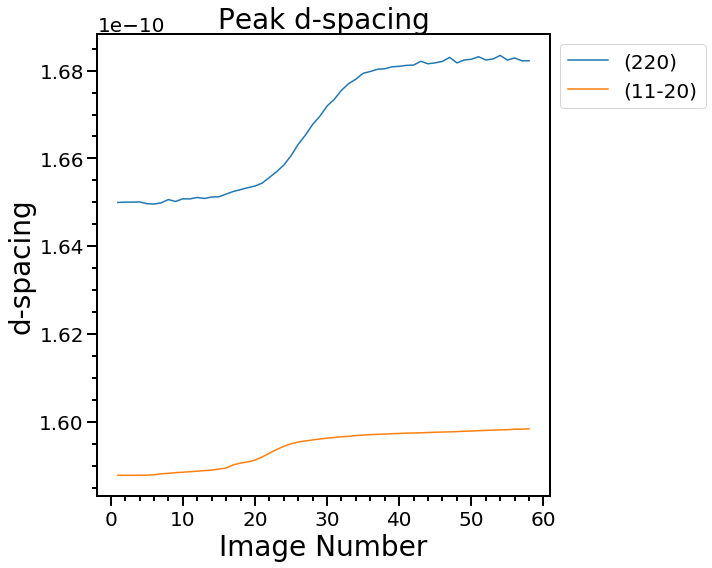

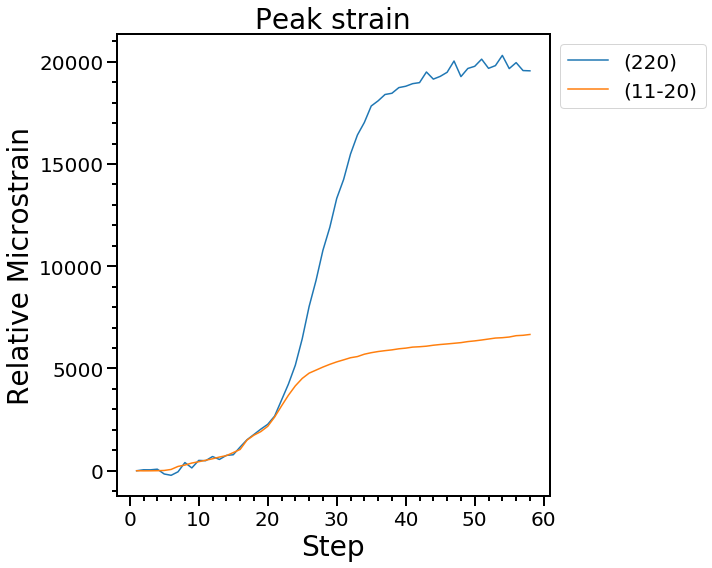

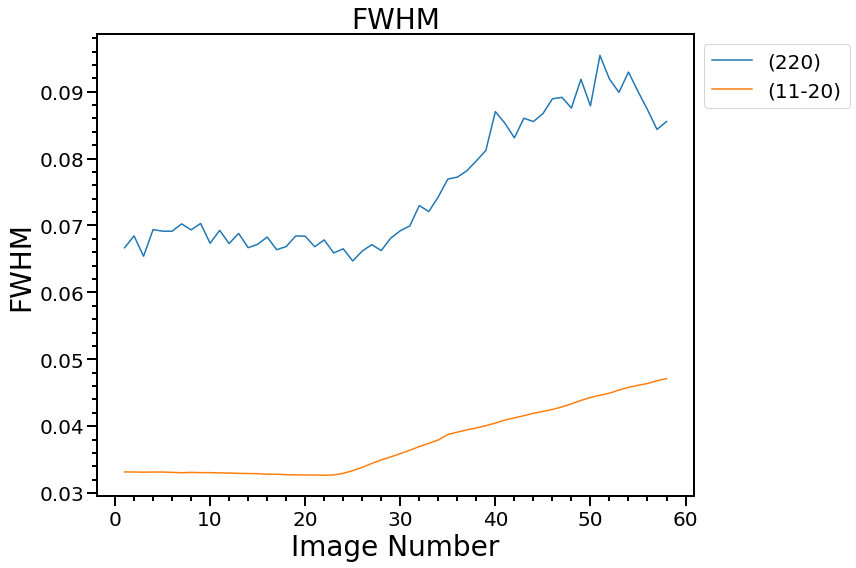

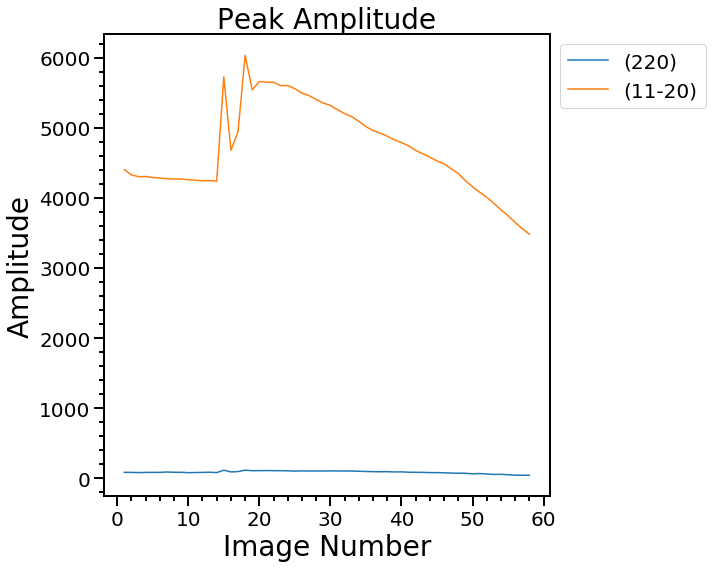

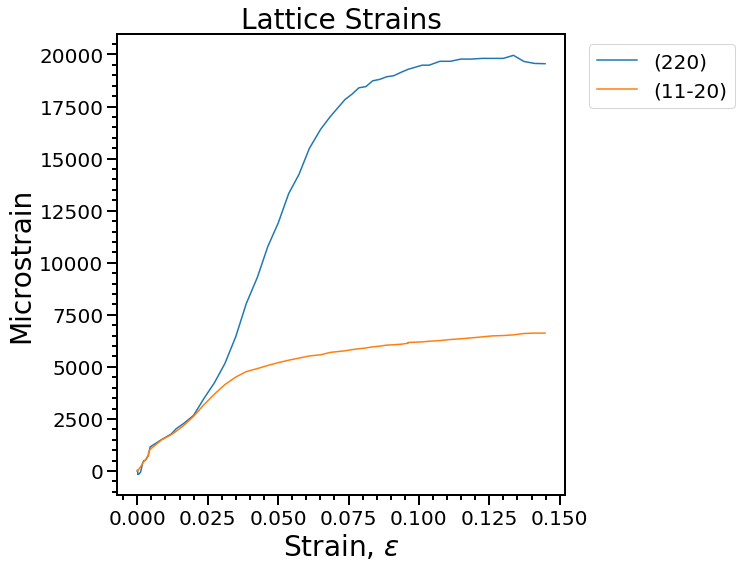

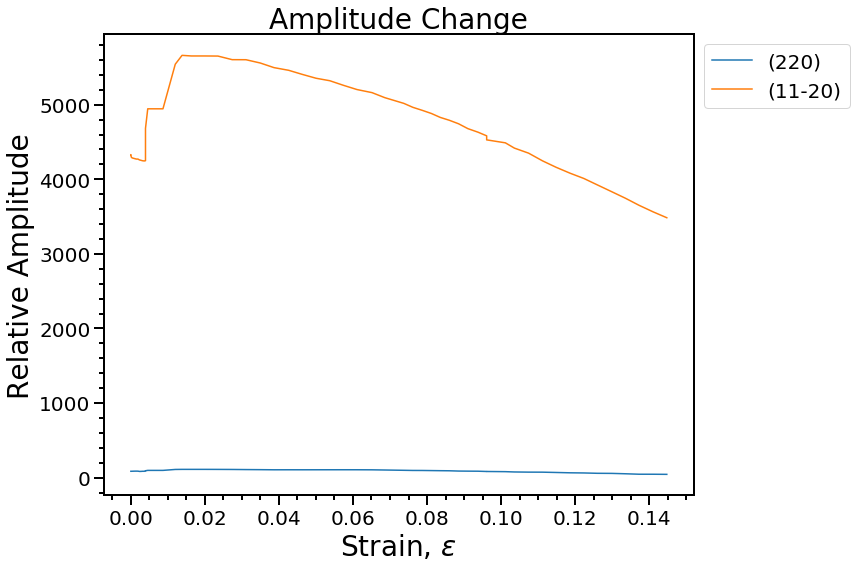

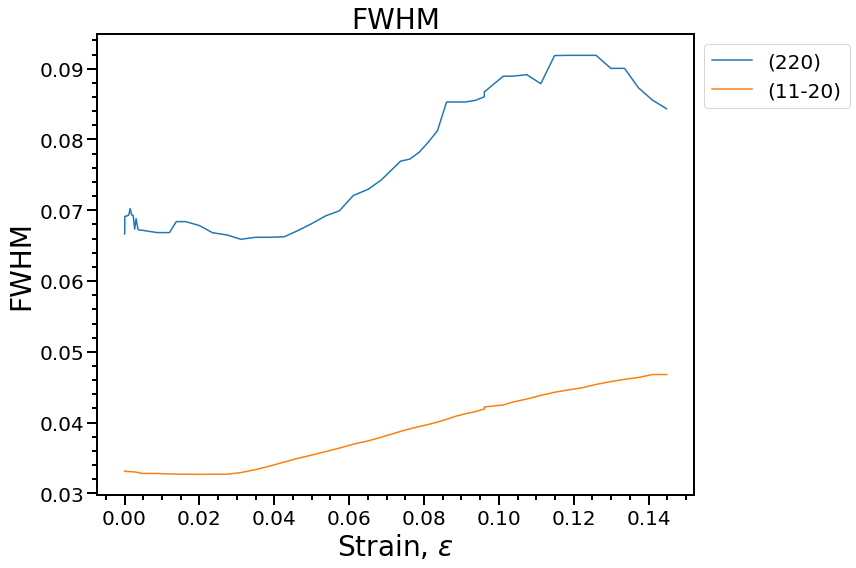

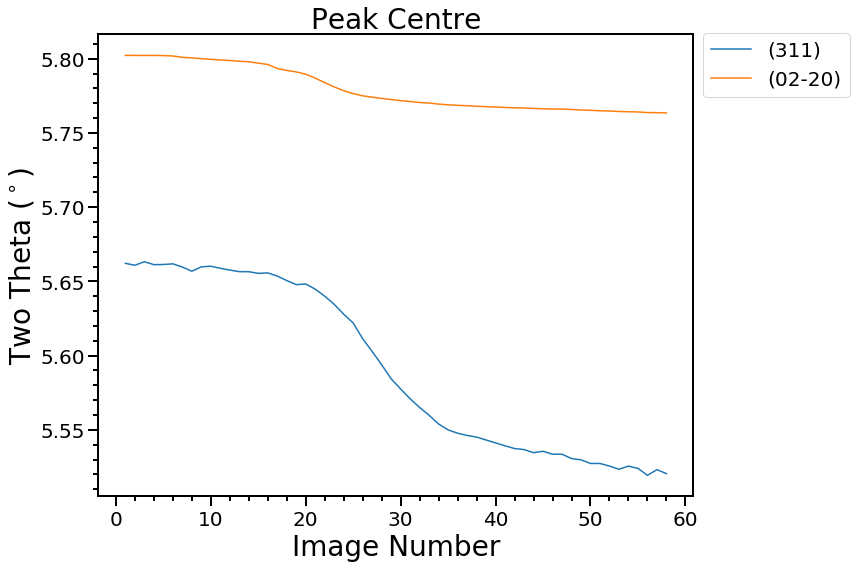

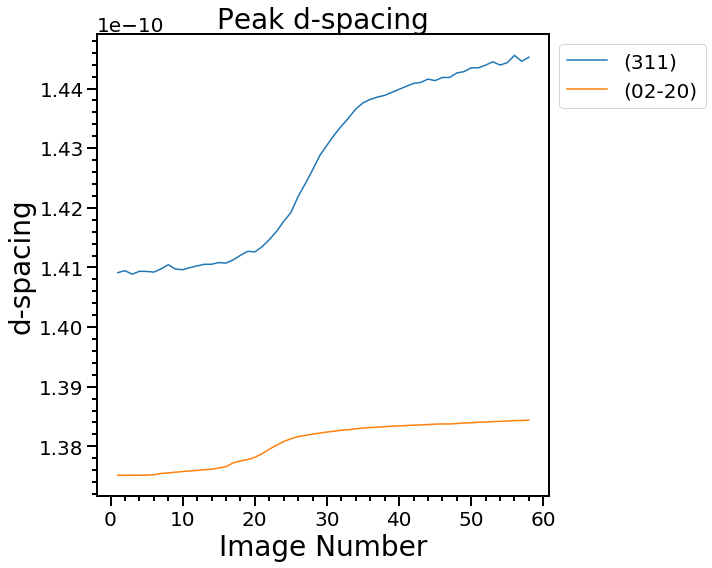

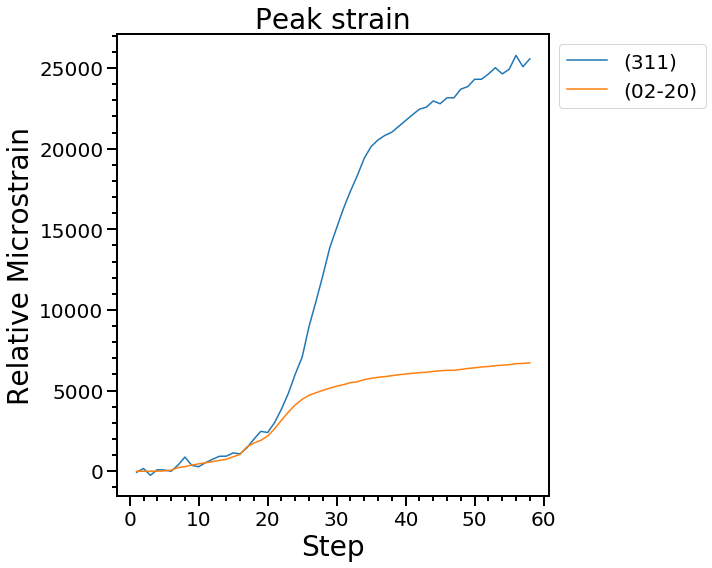

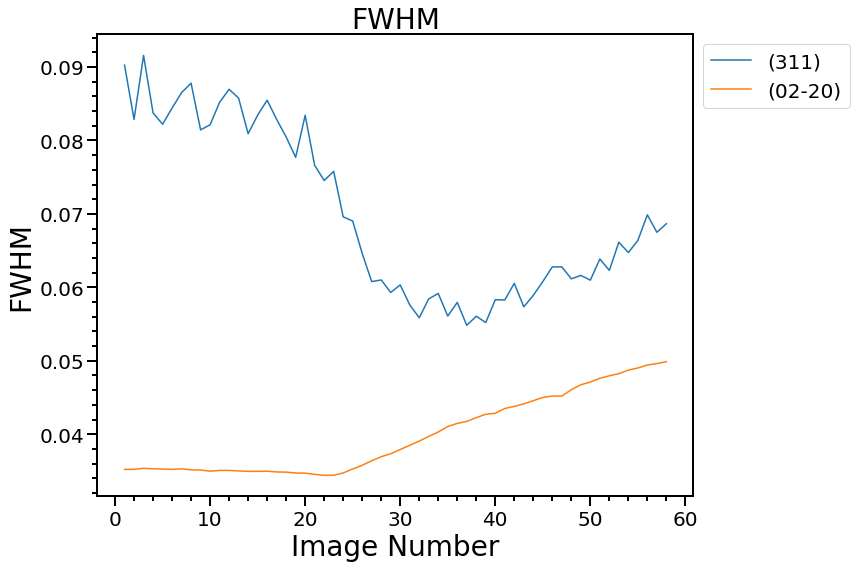

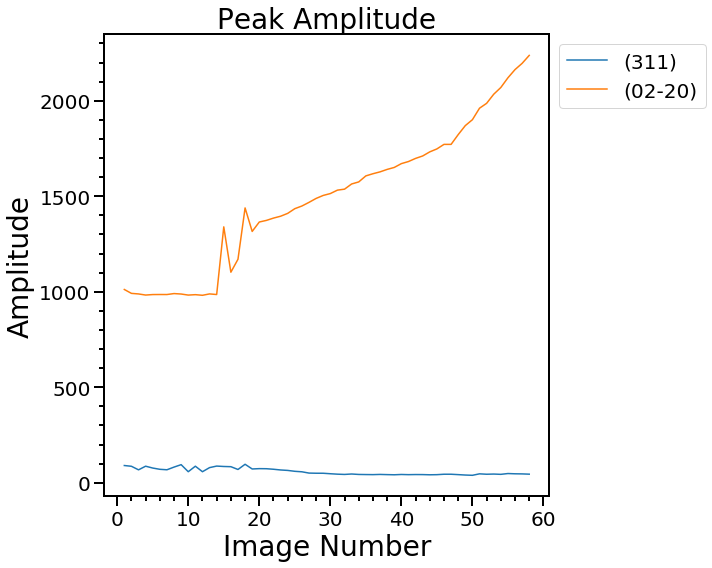

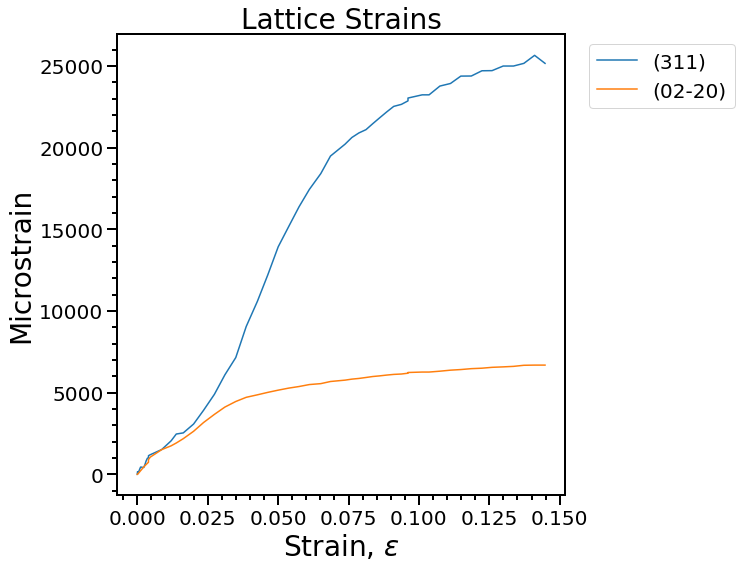

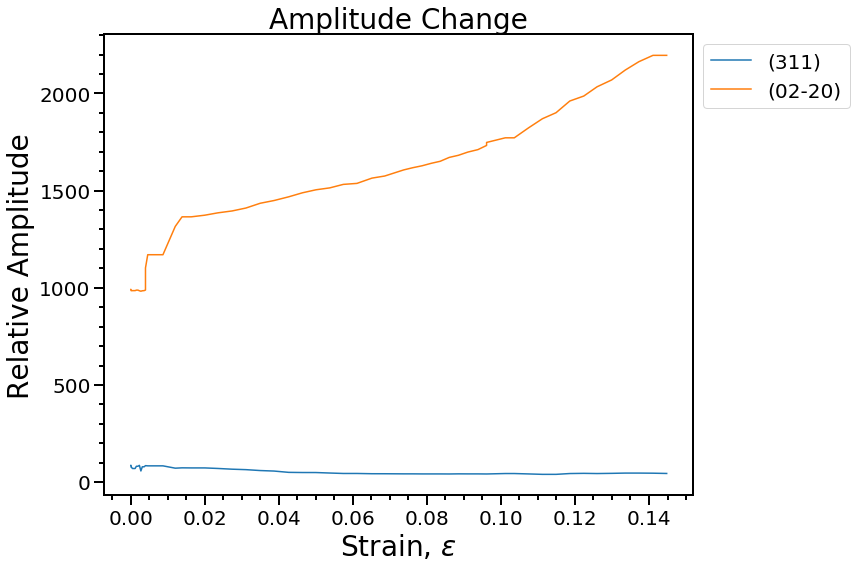

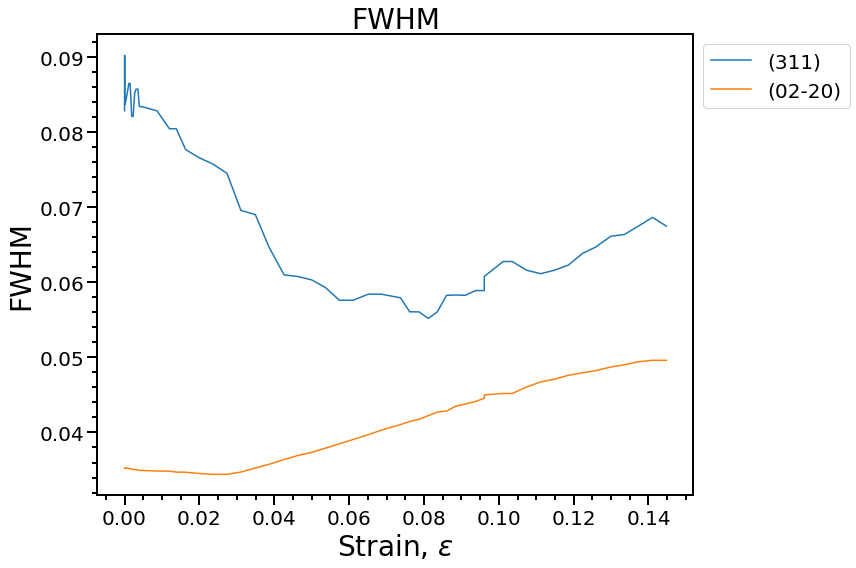

In [9]:
for peak_name in dict_names:
    
    filename = pickle_dir + peak_name
    
    print('Directory & file: {0}'.format(filename))

    with open(filename, 'rb') as handle:
        saved_list = pickle.load(handle)

    #How many images were analysed:

    print('Images analysed: {0}'.format(len(saved_list)))

    #enter names of reflections in dictionary you intend to analyse
    reflections=peak_name[peak_name.find('('):-7]
    
    print('Reflections: {0}'.format(reflections))

    # Seperated reflections from a filename
    def find(ch,string1):
        pos = []
        for i in range(len(string1)):
            if ch == string1[i]:
                pos.append(i)
        return(pos)

    allpeaks = []
    for i,j in zip(find('(', peak_name), find(')', peak_name)):
        allpeaks.append(peak_name[i:j+1])
        
    numpeaks=len(allpeaks)

    ### Extracting peak centres

    peak_list=allpeaks
    
    print('Current Peak List is: {0}'.format(peak_list))

    firstFile = 0
    lastFile = len(saved_list)
    print('Number of Strain Steps: {0}'.format(lastFile))
    step = 1

    #set up dictionaries to store the peak information
    peak_centres=dict()
    peak_fwhm=dict()
    peak_amplitude=dict()

    #n = number of reflections in peak_list, reflection will be the reflections in the peak_list
    for n, reflection in enumerate(peak_list):
        peak_centres[reflection]=[]
        peak_fwhm[reflection]=[]
        peak_amplitude[reflection]=[]

        
#### Modify list length so data has required shape ###  
        
        image_number=[]
        for i in range(len(saved_list)-1):
            
            if numpeaks > 1:
                prefix = 'pv_' + str(n+1)
            if numpeaks == 1:
                prefix = ''
            
            ttheta=saved_list[i][reflections]['params_values'][prefix + 'center']
            peak_centres[reflection].append(ttheta)
            ttheta=saved_list[i][reflections]['params_values'][prefix + 'amplitude']
            peak_amplitude[reflection].append(ttheta)
            ttheta=saved_list[i][reflections]['params_values'][prefix + 'fwhm']
            peak_fwhm[reflection].append(ttheta)
            image_number.append(i+1)


    plt.figure(figsize=(12,8))
    plt.minorticks_on()

    for reflection in peak_list:

        plt.plot(image_number,peak_centres[reflection],markersize=10,label=reflection)
        plt.legend(loc=2, bbox_to_anchor=(1,1.025))
        plt.title('Peak Centre', fontsize=28)
        plt.ylabel(r'Two Theta ($^\circ$)', fontsize=28)
        plt.xlabel('Image Number', fontsize=28)

        plt.tight_layout()
        plot_name = reflection +'_Peak_Centre'
        #plt.savefig(out_dir + plot_name, bbox_inches='tight')

    ### Plotting d-spacing

    plt.figure(figsize=(10,8))
    plt.minorticks_on()

    for reflection in peak_list:
        d_spacing=calc_dspacing(peak_centres[reflection])
        plt.plot(image_number,d_spacing,markersize=10,label=reflection)
        plt.legend(loc=2, bbox_to_anchor=(1,1))
        plt.title('Peak d-spacing', fontsize=28)
        plt.ylabel('d-spacing',fontsize=28)
        plt.xlabel('Image Number',fontsize=28)

        plt.tight_layout()
        plot_name=reflection+'_d-spacing'
        #plt.savefig(out_dir + plot_name, bbox_inches='tight')

    ### Calculating and Plotting Strain

    #Use the same calc_strain function as above, only alter how we find the reflections.
    #Don't forget to check with and without the medfilt filter.

    plt.figure(figsize=(10,8))
    plt.minorticks_on()

    for reflection in peak_list:
        strain=calc_strain(peak_centres[reflection])*1e6
        plt.plot(image_number,strain,markersize=10,label=reflection)
        plt.legend(loc=2, bbox_to_anchor=(1, 1))
        plt.title('Peak strain',fontsize=28)
        plt.ylabel('Relative Microstrain',fontsize=28)
        plt.xlabel('Step',fontsize=28)
        plt.tight_layout()

        plt.tight_layout()
        plot_name=reflection+'_Rel_Microstrain'
        #plt.savefig(out_dir + plot_name, bbox_inches='tight')

    
    ### FWHM

    plt.figure(figsize=(12,8))
    plt.minorticks_on()

    for reflection in peak_list:
        plt.plot(image_number,peak_fwhm[reflection],label=reflection)
        plt.legend(loc=2, bbox_to_anchor=(1, 1))
        plt.title('FWHM',fontsize=28)
        plt.ylabel('FWHM',fontsize=28)
        plt.xlabel('Image Number',fontsize=28)

        plt.tight_layout()
        plot_name=reflection+'_FWHM'
        #plt.savefig(out_dir + plot_name, bbox_inches='tight')

        
    ### Peak Intensity (Amplitude)

    plt.figure(figsize=(10,8))
    plt.minorticks_on()

    for reflection in peak_list:
        plt.plot(image_number,peak_amplitude[reflection],markersize=10,label=reflection)
        plt.legend(loc=2, bbox_to_anchor=(1, 1))
        plt.title('Peak Amplitude',fontsize=28)
        plt.ylabel('Amplitude',fontsize=28)
        plt.xlabel('Image Number',fontsize=28)

        plt.tight_layout()
        plot_name=reflection+'_Peak_Amplitude'
        #plt.savefig(out_dir + plot_name, bbox_inches='tight')

        
    ### Plotting Microstrain with Engineering Stress and Strain

    plt.figure(figsize=(10,8))
    plt.minorticks_on()

    for reflection in peak_list:
        L_strain=calc_strain_singlepoint(peak_centres[reflection])*1e6

        plt.plot(Eng_strain,medfilt(L_strain, 3),markersize=10,label=reflection)
        plt.legend(loc=1, bbox_to_anchor=(1.4, 1))
        plt.title('Lattice Strains',fontsize=28)
        plt.xlabel('Strain, ${\epsilon}$', fontsize=28)
        plt.ylabel('Microstrain',fontsize=28)

        plt.tight_layout()
        plot_name='Microstrain_EngStrain_' + reflection
        plt.savefig(out_dir + plot_name, bbox_inches='tight')

    ## Plotting Amplitude

    plt.figure(figsize=(12,8))
    plt.minorticks_on()

    for reflection in peak_list:
        amplitude=peak_amplitude[reflection]
        plt.plot(Eng_strain, medfilt(amplitude, 3), markersize=10,label=reflection)
        plt.legend(loc=2, bbox_to_anchor=(1, 1))
        plt.title('Amplitude Change', fontsize=28)
        plt.xlabel('Strain, ${\epsilon}$',fontsize=28)
        plt.ylabel('Relative Amplitude',fontsize=28)
        
        plt.tight_layout()
        plot_name='Amplitude_EngStrain_' + reflection
        plt.savefig(out_dir + plot_name, bbox_inches='tight')

    ### FWHM

    plt.figure(figsize=(12,8))
    plt.minorticks_on()

    for reflection in peak_list:
        plt.plot(Eng_strain,medfilt(peak_fwhm[reflection], 3),label=reflection)
        plt.legend(loc=2, bbox_to_anchor=(1, 1))
        plt.title('FWHM',fontsize=28)
        plt.xlabel('Strain, ${\epsilon}$',fontsize=28)
        plt.ylabel('FWHM',fontsize=28)
        
        plt.tight_layout()
        plot_name='FWHM_EngStrain_' + reflection
        plt.savefig(out_dir + plot_name, bbox_inches='tight')

# Seperate out hydride peaks from Matrix:

In [10]:
#dir_FitResults=Path(str('Test_Sample2_FitResults/'))
#dir_FitResults=f'{dir_FitResults}{os.sep}'
print('Directory of pickled analysis files: ' + pickle_dir)



Directory of pickled analysis files: Test_Sample2_FitResults_Cake19\


In [11]:
pickle_file_list = dict_names
#pickle_dir = Path(str('Test_Sample2_FitResults/'))
#pickle_dir = f'{dir_FitResults}{os.sep}'

list_matrix_peaks = []
list_matrix_peak_centers = []
list_ZrH_peaks = []
list_ZrH_peak_centres = []

list_ZrH_peak_fwhm = []
list_ZrH_peak_amplitude = []
list_matrix_peak_fwhm = []
list_matrix_peak_amplitude = []

# open file

for pickle_file in pickle_file_list:
    filename = pickle_dir + pickle_file
    print('Directory & file: {0}'.format(filename))
    
    # seperate out reflections

    with open(filename, 'rb') as handle:
        saved_list = pickle.load(handle)

    #How many images were analysed:

    print('Images analysed: {0}'.format(len(saved_list)))

    #enter names of reflections in dictionary you intend to analyse
    reflections=pickle_file[pickle_file.find('('):-7]
    
    print('Reflections: {0}'.format(reflections))

    # Seperated reflections from a filename
    def find(ch,string1):
        pos = []
        for i in range(len(string1)):
            if ch == string1[i]:
                pos.append(i)
        return(pos)

    allpeaks = []
    for i,j in zip(find('(', pickle_file), find(')', pickle_file)):
        allpeaks.append(pickle_file[i:j+1])
        
    numpeaks=len(allpeaks)
    
    ### Extracting peak centres

    peak_list=allpeaks
    
    print('Current Peak List is: {0}'.format(peak_list))

    firstFile = 0
    lastFile = len(saved_list)
    print('Number of Strain Steps: {0}'.format(lastFile))
    step = 1

# isolate hydride reflections
    
    for i in peak_list:
       
    #set up dictionaries to store the peak information
        peak_centres=dict()
        peak_fwhm=dict()
        peak_amplitude=dict()    
        ZrH_peak_centres=dict()
        ZrH_peak_fwhm=dict()
        ZrH_peak_amplitude=dict()

    #n = number of reflections in peak_list, reflection will be the reflections in the peak_list
    for n, reflection in enumerate(peak_list):
        
        if len(reflection) > 5:
            peak_centres[reflection]=[]
            peak_fwhm[reflection]=[]
            peak_amplitude[reflection]=[]
        
        if len(reflection) <= 5:
            ZrH_peak_centres[reflection]=[]
            ZrH_peak_fwhm[reflection]=[]
            ZrH_peak_amplitude[reflection]=[]


        image_number=[]
        
#### Modify list length so data has required shape ###
        
        for i in range(len(saved_list)-1):
            
            if numpeaks > 1:
                prefix = 'pv_' + str(n+1)
            if numpeaks == 1:
                prefix = ''
            
            if len(reflection) <= 5:
                
                ttheta=saved_list[i][reflections]['params_values'][prefix + 'center']
                ZrH_peak_centres[reflection].append(ttheta)
                
                ttheta=saved_list[i][reflections]['params_values'][prefix + 'amplitude']
                ZrH_peak_amplitude[reflection].append(ttheta)
                
                ttheta=saved_list[i][reflections]['params_values'][prefix + 'fwhm']
                ZrH_peak_fwhm[reflection].append(ttheta)


            
            if len(reflection) > 5:
                ttheta=saved_list[i][reflections]['params_values'][prefix + 'center']
                peak_centres[reflection].append(ttheta)
                
                ttheta=saved_list[i][reflections]['params_values'][prefix + 'amplitude']
                peak_amplitude[reflection].append(ttheta)
                
                ttheta=saved_list[i][reflections]['params_values'][prefix + 'fwhm']
                peak_fwhm[reflection].append(ttheta)
        
        #print(peak_centres[reflection])

        if len(reflection) <= 5:

            list_ZrH_peaks.append(reflection)

            x = list(ZrH_peak_centres.values())[0]
            fwhm = list(ZrH_peak_fwhm.values())[0]
            amp = list(ZrH_peak_amplitude.values())[0]
            if len(list(ZrH_peak_centres.values())) > 1:
                raise Exception
            list_ZrH_peak_centres.append(x)
            list_ZrH_peak_fwhm.append(fwhm)
            list_ZrH_peak_amplitude.append(amp)


        else:
            #print(peak_centres.values())
            y = list(peak_centres.values())[0]
            m_fwhm = list(peak_fwhm.values())[0]
            m_amp = list(peak_amplitude.values())[0]
            list_matrix_peak_centers.append(y)           
            list_matrix_peak_fwhm.append(m_fwhm)
            list_matrix_peak_amplitude.append(m_amp)
            list_matrix_peaks.append(reflection)

Directory & file: Test_Sample2_FitResults_Cake19\Strain_(01-10) & (111).pickle
Images analysed: 59
Reflections: (01-10) & (111)
Current Peak List is: ['(01-10)', '(111)']
Number of Strain Steps: 59
Directory & file: Test_Sample2_FitResults_Cake19\Strain_(220) & (11-20).pickle
Images analysed: 59
Reflections: (220) & (11-20)
Current Peak List is: ['(220)', '(11-20)']
Number of Strain Steps: 59
Directory & file: Test_Sample2_FitResults_Cake19\Strain_(311) & (02-20).pickle
Images analysed: 59
Reflections: (311) & (02-20)
Current Peak List is: ['(311)', '(02-20)']
Number of Strain Steps: 59


In [12]:
x = list(zip(list_ZrH_peaks, list_ZrH_peak_centres))            
y = list(zip(list_matrix_peaks, list_matrix_peak_centers))
            
#print('Hydride peaks extracted: {0}'.format(list_ZrH_peaks))
#print('List of all hydride peaks & centres: {0}'.format(x))
print('Matrix peaks: {0}'.format(list_matrix_peaks))
#print('Matrix peak centres: {0}'.format(list_matrix_centers))
print('Matrix Peak & Centres are: {0}'.format(y))

Matrix peaks: ['(01-10)', '(11-20)', '(02-20)']
Matrix Peak & Centres are: [('(01-10)', [2.9008359157761032, 2.900872481249892, 2.9008618697799378, 2.9008597108300704, 2.9008108263545904, 2.9006821754463092, 2.900245978743853, 2.9000462872926698, 2.8997697190498255, 2.8995702138212787, 2.899354891686391, 2.899152709415368, 2.8988965200392265, 2.8986891669580874, 2.898288007415348, 2.8978537878963153, 2.896525649595324, 2.8958427920499226, 2.895327579221415, 2.894587325028348, 2.8932993266538998, 2.891719719991415, 2.8902791781719643, 2.889014474136002, 2.888022224286382, 2.8873215069842812, 2.886919445643728, 2.886480118234416, 2.88608367819375, 2.8857195424149964, 2.8854231297105497, 2.8850792156739256, 2.8849147671050415, 2.8845475803197034, 2.8843106454016367, 2.884138227708348, 2.884005528952539, 2.8838916750754846, 2.883722417140015, 2.8836075179887737, 2.8834577261360765, 2.883347108986351, 2.8832594082688345, 2.8831510837870504, 2.88301538946721, 2.8829405580518834, 2.8828675008

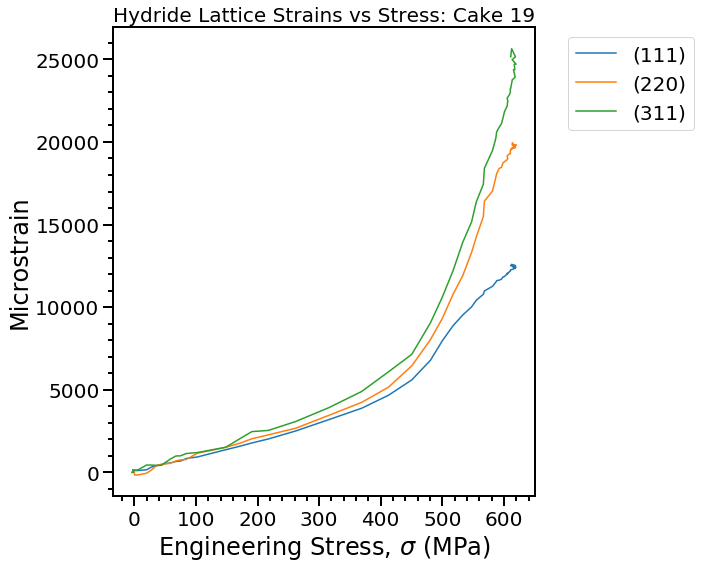

In [14]:
plt.figure(figsize=(10,8))
plt.minorticks_on()
    
for i, j in zip(list_ZrH_peak_centres, list_ZrH_peaks):
    L_strain=calc_strain_singlepoint(i)*1e6

    plt.plot(Eng_stress,medfilt(L_strain, 3),markersize=8,label=j)
    plt.legend(loc=1, bbox_to_anchor=(1.4, 1))
    plt.title('Hydride Lattice Strains vs Stress: ' + out_dir.split('\\')[1].split('_')[0],fontsize=20)
    plt.xlabel('Engineering Stress, ${\sigma}$ (MPa)', fontsize=24)
    plt.ylabel('Microstrain',fontsize=24)

    plt.tight_layout()
    plot_name='All Hydride Lattice Strains vs Stress'
    plt.savefig(out_dir + plot_name , bbox_inches='tight')



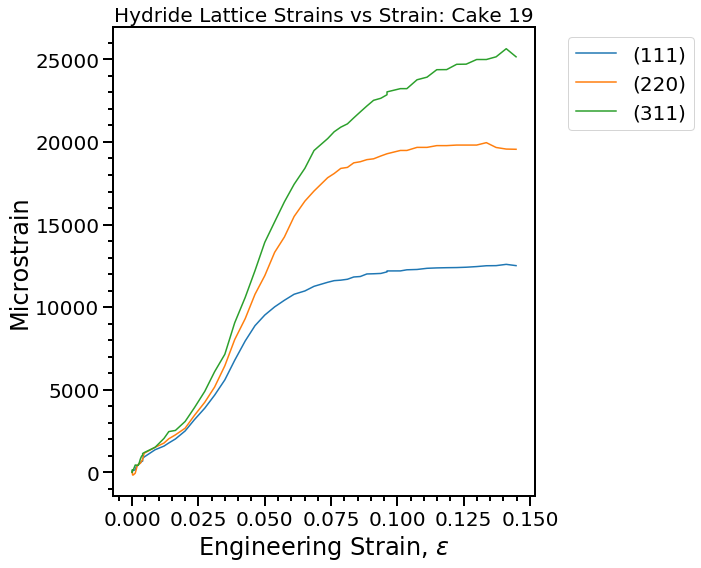

In [15]:
plt.figure(figsize=(10,8))
plt.minorticks_on()
    
for i, j in zip(list_ZrH_peak_centres, list_ZrH_peaks):
    L_strain=calc_strain_singlepoint(i)*1e6

    plt.plot(Eng_strain,medfilt(L_strain, 3),markersize=8,label=j)
    plt.legend(loc=1, bbox_to_anchor=(1.4, 1))
    plt.title('Hydride Lattice Strains vs Strain: ' + out_dir.split('\\')[1].split('_')[0],fontsize=20)
    plt.xlabel('Engineering Strain, ${\epsilon}$', fontsize=24)
    plt.ylabel('Microstrain',fontsize=24)

    plt.tight_layout()
    plot_name='All Hydride Lattice Strains vs Strain'
    plt.savefig(out_dir + plot_name , bbox_inches='tight')

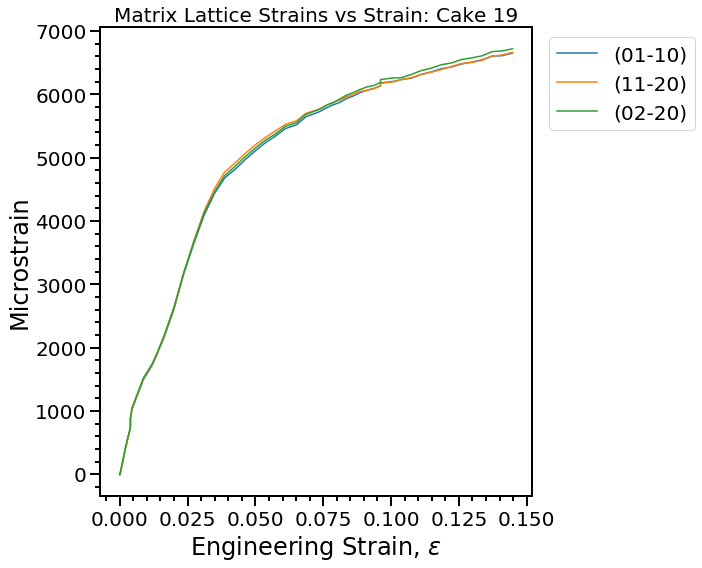

In [16]:
plt.figure(figsize=(10,8))
plt.minorticks_on()
    
for i, j in zip(list_matrix_peak_centers, list_matrix_peaks):
    L_strain=calc_strain_singlepoint(i)*1e6

    plt.plot(Eng_strain,L_strain,markersize=8,label=j)
    plt.legend(loc=1, bbox_to_anchor=(1.4, 1))
    plt.title('Matrix Lattice Strains vs Strain: ' + out_dir.split('\\')[1].split('_')[0],fontsize=20)
    plt.xlabel('Engineering Strain, ${\epsilon}$', fontsize=24)
    plt.ylabel('Microstrain',fontsize=24)

    plt.tight_layout()
    plot_name = 'All Matrix Lattice Strains vs Strain'
    plt.savefig(out_dir + plot_name, bbox_inches='tight')


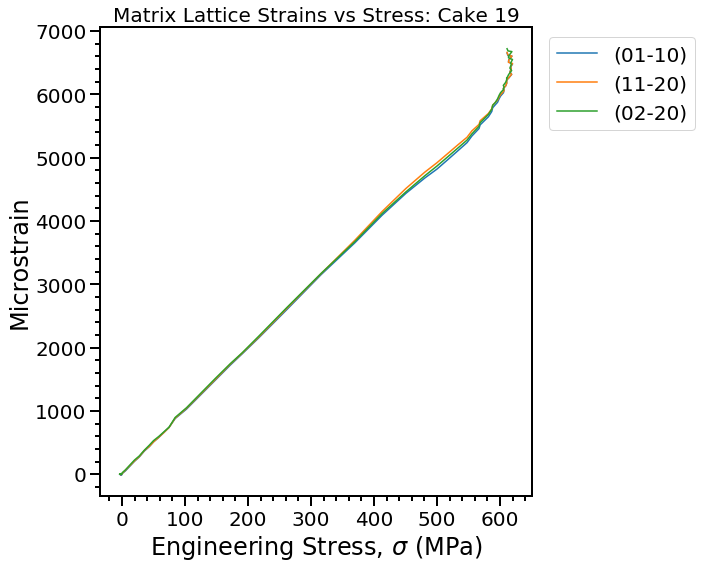

In [17]:
plt.figure(figsize=(10,8))
plt.minorticks_on()
    
for i, j in zip(list_matrix_peak_centers, list_matrix_peaks):
    L_strain=calc_strain_singlepoint(i)*1e6

    plt.plot(Eng_stress,L_strain,markersize=8,label=j)
    plt.legend(loc=1, bbox_to_anchor=(1.4, 1))
    plt.title('Matrix Lattice Strains vs Stress: ' + out_dir.split('\\')[1].split('_')[0],fontsize=20)
    plt.xlabel('Engineering Stress, ${\sigma}$ (MPa)', fontsize=24)
    plt.ylabel('Microstrain',fontsize=24)

    plt.tight_layout()
    plot_name = 'All Matrix Lattice Strains vs Stress'
    plt.savefig(out_dir + plot_name, bbox_inches='tight')

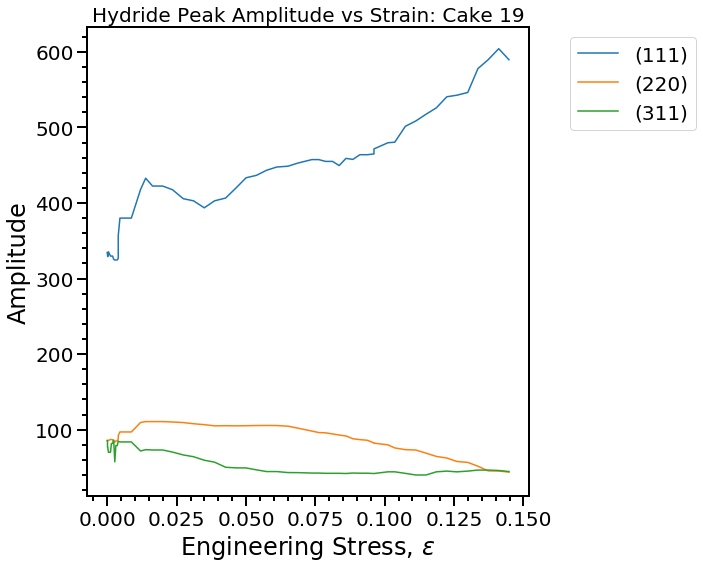

In [19]:
plt.figure(figsize=(10,8))
plt.minorticks_on()
    
for i, j in zip(list_ZrH_peak_amplitude, list_ZrH_peaks):
    plt.plot(Eng_strain,medfilt(i, 3),markersize=8,label=j)
    plt.legend(loc=1, bbox_to_anchor=(1.4, 1))
    plt.title('Hydride Peak Amplitude vs Strain: ' + out_dir.split('\\')[1].split('_')[0],fontsize=20)
    plt.xlabel('Engineering Stress, ${\epsilon}$', fontsize=24)
    plt.ylabel('Amplitude',fontsize=24)

    plt.tight_layout()
    plot_name='All Hydride Amplitude Changes vs Strain'
    plt.savefig(out_dir + plot_name , bbox_inches='tight')

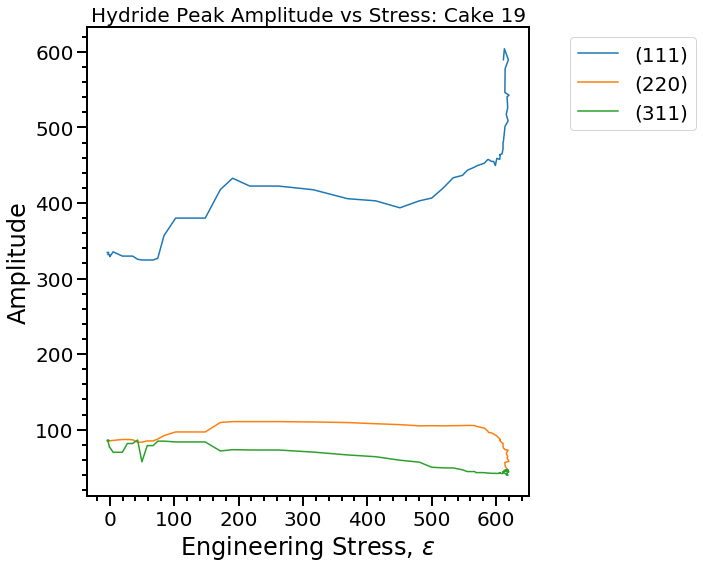

In [20]:
plt.figure(figsize=(10,8))
plt.minorticks_on()
    
for i, j in zip(list_ZrH_peak_amplitude, list_ZrH_peaks):
    plt.plot(Eng_stress,medfilt(i, 3),markersize=8,label=j)
    plt.legend(loc=1, bbox_to_anchor=(1.4, 1))
    plt.title('Hydride Peak Amplitude vs Stress: ' + out_dir.split('\\')[1].split('_')[0],fontsize=20)
    plt.xlabel('Engineering Stress, ${\epsilon}$', fontsize=24)
    plt.ylabel('Amplitude',fontsize=24)

    plt.tight_layout()
    plot_name='All Hydride Amplitude Changes vs Stress'
    plt.savefig(out_dir + plot_name , bbox_inches='tight')

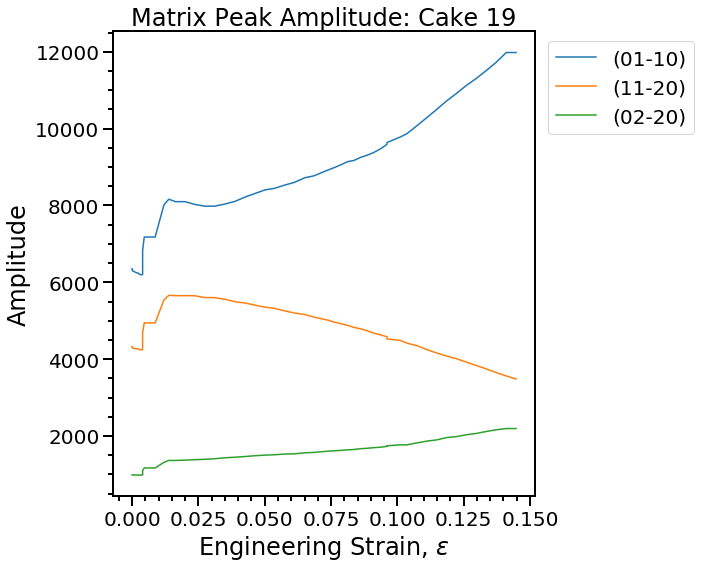

In [21]:
plt.figure(figsize=(10,8))
plt.minorticks_on()
    
for i, j in zip(list_matrix_peak_amplitude, list_matrix_peaks):
    plt.plot(Eng_strain,medfilt(i, 3),markersize=8,label=j)
    plt.legend(loc=1, bbox_to_anchor=(1.4, 1))
    plt.title('Matrix Peak Amplitude: ' + out_dir.split('\\')[1].split('_')[0],fontsize=24)
    plt.xlabel('Engineering Strain, ${\epsilon}$', fontsize=24)
    plt.ylabel('Amplitude',fontsize=24)

    plt.tight_layout()
    plot_name='All Matrix Amplitude Changes'
    plt.savefig(out_dir + plot_name , bbox_inches='tight')

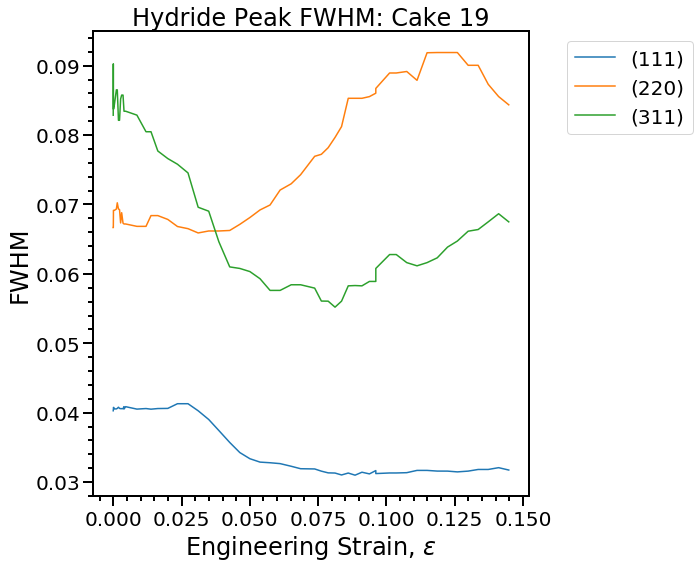

In [22]:
plt.figure(figsize=(10,8))
plt.minorticks_on()
    
for i, j in zip(list_ZrH_peak_fwhm, list_ZrH_peaks):
    plt.plot(Eng_strain,medfilt(i, 3),markersize=8,label=j)
    plt.legend(loc=1, bbox_to_anchor=(1.4, 1))
    plt.title('Hydride Peak FWHM: ' + out_dir.split('\\')[1].split('_')[0],fontsize=24)
    plt.xlabel('Engineering Strain, ${\epsilon}$', fontsize=24)
    plt.ylabel('FWHM',fontsize=24)

    plt.tight_layout()
    plot_name='All Hydride FWHM Changes'
    plt.savefig(out_dir + plot_name , bbox_inches='tight')

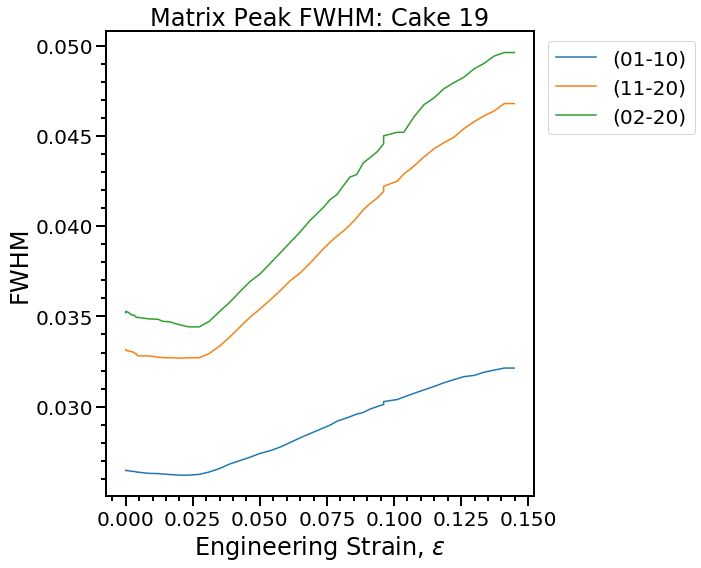

In [23]:
plt.figure(figsize=(10,8))
plt.minorticks_on()
    
for i, j in zip(list_matrix_peak_fwhm, list_matrix_peaks):
    plt.plot(Eng_strain,medfilt(i, 3),markersize=8,label=j)
    plt.legend(loc=1, bbox_to_anchor=(1.4, 1))
    plt.title('Matrix Peak FWHM: ' + out_dir.split('\\')[1].split('_')[0],fontsize=24)
    plt.xlabel('Engineering Strain, ${\epsilon}$', fontsize=24)
    plt.ylabel('FWHM',fontsize=24)

    plt.tight_layout()
    plot_name='All Matrix FWHM Changes'
    plt.savefig(out_dir + plot_name , bbox_inches='tight')

In [24]:
print(list_matrix_peaks)

['(01-10)', '(11-20)', '(02-20)']
